# Diagnosis of Breast Cancer with K-Nearst Neighbor Algorithm

Haozhe.Tong SID: 13019841

Ruiyang. Hu SID: 13055189

## Introduction

K-Nearest Neighbor (K-NN) is a simple algorithm in machine learning, it is a basic classification ad regression method. Generally, K-Nearest Neighbor algorithm uses the method of measuring the distance between different eigenvalues for classification (Peterson, 2009). If most of the K nearest samples, which refers to the closest samples, of a sample in the feature space belong to a certain category, then the sample also belongs to this category and has the characteristics of the samples in this category. The advantages of K-Nearest Neighbor include high accuracy, insensitive to outliers and no data input assumption (Peterson, 2009). However, the computational complexity and space complexity of it is high. Therefore, it is normally applied for the numeric and nominal data type. 

The steps of K-Nearest Neighbor can be described as the following steps (Bronshtein, 2017):
    1.	Calculate the distance between sample data and data to be classified.
    2.	Choose K samples with the smallest distance from the data to be classified. 
    3.	Count the classification of which most of the K samples belong.
    4.	Classify the data to that classification. 


## Exploration 

### Data Preprocess

Preprocess data is an essential step before load dataset into K-NN algorithm. A dataset should randomly be divided into training dataset for making prediction and test dataset for evaluation accuracy. So, the function could like:

In [1]:
import csv 
import random

# Preprocess raw data
def loadDataset (filename,split,trainingSet=[] , testSet=[] ):
    filename = 'data.csv'
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    dataset = list(reader)
    for x in range (len(dataset) - 1):
        for y in range (4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In this function, we load a CSV file called “data” and divide the whole dataset into a training dataset and test dataset and the function can be tested through this way:

In [2]:
    trainingSet = []
    testSet = []
    split = 0.70
    loadDataset('data.csv', split, trainingSet,testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))

Train set: 399
Test set: 169


The result shows there are 400 samples in training dataset and 168 samples in test dataset.

### Distance Calculation

There are two formulas currently used in K-NN algorithm to calculate the distance between sample data and data classified, they are called Euclidean distance and Manhattan distance (Peterson, L.E, 2009). The formulas are presented below:

Euclidean distance: $d(x,y) = \sqrt{\sum_{k=1}^{n}{(x_k - y_k)^2}}$


Manhattan distance: $d(x,y) = \sqrt{\sum_{k=1}^{n}{\lvert(x_k - y_k)\rvert}}$

For those numerical data like iris, it is more suitable for them to calculate through Euclidean distance. The function of Euclidean distance is like:

In [3]:
import math
# Calculate the distance between two sample
def euclideanDistance (instance1,instance2,length):
    distance = 0
    for x in range (length):
        distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)

In order to test this function, we build some fake data, like:

In [4]:
data1 = [1, 2, 3, 'x']
data2 = [4, 5, 6, 'y']
distance = euclideanDistance (data1, data2,3)
print("Distance: " + repr(distance))

Distance: 5.196152422706632


### Finding Neighbor

Through the distance formula, there could serval data instances closest to the data that required prediction be found. The function is shown below: 

In [5]:
import operator
# Find Neighbors
def getNeighbors(trainingSet,testInstance, k):
    distance = []
    length = len(testInstance) - 1
    for x in trainingSet:
        dist = euclideanDistance(testInstance, x, length)
        distance.append((x, dist))
    distance.sort(key = operator.itemgetter(1))
    neighbors = [x[0] for x in distance[:k]]
    return neighbors

we build a training dataset and a test dataset to test this function where k = 1.

In [6]:
trainingSet = [[1, 2, 3, 'x'],
               [4, 5, 6, 'y']]
testInstance = [7,8,9]
k = 1
neighbors = getNeighbors(trainingSet, testInstance, k)
print(neighbors)

[[4, 5, 6, 'y']]


### Classify classification

After the few steps above, one function should be built to get the result and it is shown below:

In [7]:
import operator
# Get Response
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(),key =operator.itemgetter(1),
                         reverse = True)
    return sortedVotes[0][0]

And the data used to test the function is presented:

In [8]:
neighbors = [[1, 2, 3, 'x'],
             [4, 5, 6, 'y'],
             [7, 8, 9, 'z']]
response = getResponse(neighbors)
print (response)

x


For any algorithm, it is always important to calculate accuracy. One of the approaches to evaluate accuracy is to count the proportion of correctly predicted by the algorithm in the test dataset. And this is implemented in K-NN algorithm though the way:

In [9]:
# Calculate Prediction Accuracy
def getAccuracy (testSet, predictions):
    correct = 0
    for x in range (len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

It can be tested with a random sample:

In [10]:
testSet = [ [1, 2, 3, 'x'],
            [4, 5, 6, 'y'],
            [7, 8, 9, 'z']]
prediction = ['x','x','x']
accuracy = getAccuracy(testSet, prediction)
print(accuracy)

33.33333333333333


## Methodology

Before loading the data into K-NN algorithm and predict the result,we try to analysis the data of breast cancer with some functions in the begining to get a more accurate prediction.    

In [11]:
import csv 
import random
import math 
import operator
import numpy as np
import pandas as pd

In [12]:
filename = pd.read_csv('data1.csv') 

In the function below, we try to obtain a overview of the dataset of breast cancer:

In [13]:
filename.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In the K-NN algorithm, it can only be implemented for the numeric or nominal data type, so, through the function below, we can observe the data types of each attribute. An algorithm must check whether missing value existing or not. This another purpose for us to build this function

In [14]:
filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

We can know what attributes can be predicted and what attributes can be used to predict through the following function. Because only "diagnosis" attribute have two categories which refers to 2 and 4 (2 is malignant, 4 is benign) and they can be predicted.

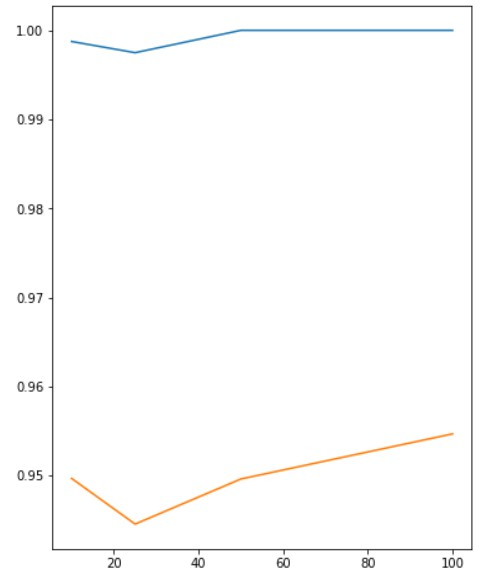

In this paper, we extracted 569 instances from Wisconsin Breast Cancer Dataset. We build a function to pre-process the raw data to enable them to be divided into a training dataset and test dataset. The ratio of the training dataset to the test dataset is seven to three in this algorithm.

After loading data into K-NN algorithm, the distance between two samples will be calculated through the Euclidean distance formula. And then find the closest neighbor for the predicted data and classify them as that category. 

The response of classification will be returned with accuracy when the result displayed in the end. And the whole method of K-NN algorithm is stated:

In [16]:
import csv 
import random
import math 
import operator
import numpy as np
import pandas as pd

In [24]:
# Preprocess raw data
def loadDataset (filename,split,trainingSet=[] , testSet=[] ):
    filename = 'data.csv'
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    dataset = list(reader)
    for x in range (len(dataset) - 1):
        for y in range (4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In [18]:
# Calculate the distance between two sample
def euclideanDistance (instance1,instance2,length):
    distance = 0
    for x in range (length):
        distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)

In [19]:
# Find Neighbors
def getNeighbors(trainingSet,testInstance, k):
    distance = []
    length = len(testInstance) - 1
    for x in trainingSet:
        dist = euclideanDistance(testInstance, x, length)
        distance.append((x, dist))
    distance.sort(key = operator.itemgetter(1))
    neighbors = [x[0] for x in distance[:k]]
    return neighbors

In [20]:
# Get Response
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(),key =operator.itemgetter(1),
                         reverse = True)
    return sortedVotes[0][0]

In [21]:
# Calculate Prediction Accuracy
def getAccuracy (testSet, predictions):
    correct = 0
    for x in range (len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [22]:
# Prepare dataset
def main():
    trainingSet = []
    testSet = []
    split = 0.70
    loadDataset('data.csv', split, trainingSet,testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
# Get prediction    
    predictions = []
    k = 3
    for x in range (len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print("> predicted = " + repr(result) + ", actual = " + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print ('Accuracy: ' + repr(accuracy) + "%")

In [25]:
main()

Train set: 407
Test set: 161
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '2', actual = '2'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '2', actual = '2'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '4', actual = '4'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted = '2', actual = '2'
> predicted

## Evaluation

K-NN algorithm is an expert in handling numeric or nominal data. In the Breast Cancer dataset, we try to predict whether a breast tissue is malignant or benign and a malignant tumor is marked as “2” while a benign tumor is “4”. The diagnosis of breast tissue is decided by the 29 attributes before it such as “radisu_mean”, “texture_mean” …, all of the attributes except “diagnosis” attribute are numeric data where diagnosis attribute is nominal data. 

Because of the feature of K-NN algorithm, a larger value of K leads to a more accurate result. The value of K represents the number of neighbors used to classify samples. Therefore, we test the algorithm with different K value and compare the accuracy of each test in the same condition. The line chart of K values and accuracy is presented below:

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
le=LabelEncoder()
for i in filename.columns:
    filename[i]=le.fit_transform(filename[i])

X=filename[filename.columns[:-1]]
y=filename['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

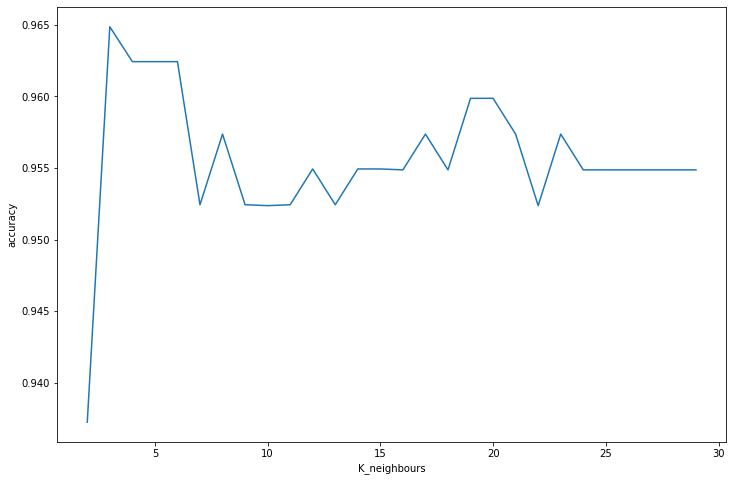

In [34]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("K_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

As the graph shown, the higest accuracy reach when K is around 3.   

The entire dataset is separated into a training dataset and test dataset which occupied 70% and 30%. we tried to test this algorithm with k is 3 and get the accuracy of prediction. The accuracy is the highest within 70% as compared with other percentages like 67% and 33%, 80% and 20% or 75% and 25%. 

On the other hand, we try to implement Random Forest algorithm to breast cancer dataset as a contrast. We draw a grph to show the accuarcy of random forest below:

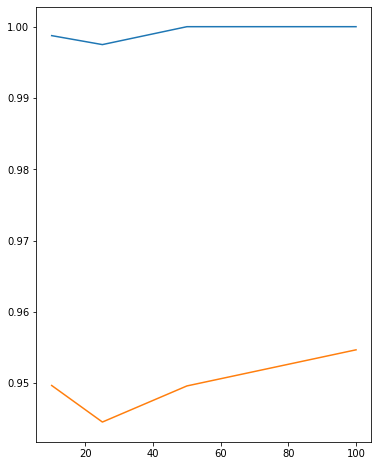

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In the graph, the blue line represents the accuracy trend of training data and the orange line represents the accuracy trend of testing data. By comparing the result of two algorithms, we can clearly obeserve that K-Nearest Neighbor have higher accuracy than Random Forest for this dataset.    

## Conclusion 

K-Nearest Neighbor is an efficient algorithm for a large dataset with the numeric or nominal data type. However, the accuracy of prediction is not stable because a whole dataset should be randomly split into a training dataset and test dataset. As the different samples in each dataset, the result could be different even though keeping the same condition. This is about the feature of K-NN algorithm which could be difficult to improve. 

For this sample, the tumors can be distinguished as benign or malignant through this model among patient. This could be extended to the general public who has no breast cancer not only include the patient. People can be classified as healthy, benign or malignant.

## Ethical

K-NN algorithm can be applied for data prediction, therefore, it could be utilized for breast cancer diagnosis. Breast cancer is the most common type of cancer in the world and it is the main reason that leads to the cause of death among women (Rana et al. 2015). The most effective way to reduce breast cancer deaths is early detection. Breast cancer refers to the uncontrolled growth of cells in breast tissue. It could adversely affect the whole body if these cells are not stopped such as bone pain, enlarged lymph nodes, dyspnea or jaundice. 

In order to predict the data, we need to get the information of the patient. However, that might invasion of privacy. The people who might have disease may not be willing to give their personal information or case to us. Because of this, the algorithm may not be useful in many cases. If we take the personal information from the patient without knowing them, even though it is helpful to the patient, it still has a serious ethical issue

Also, the accuracy will not be 100% which means it will have mistakes.If there is any mistake happen in this case, it means patient may not get the suitable treatment and this may cause their lots of money, or even cause their lives.


## Reference

Bronshtein, A., 2017, A Quick Introduction to K-Nearest Neighbors Algorithm, A Medium Corporation, viewed 16 September 2019, <https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7>

Breast Cancer Wisconsin (Diagnostic) Data Set 2019, Kaggle.com. viewed 18 September 2019, <https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv>.

Brownlee, J., 2014, Tutorial To Implement k-Nearest Neighbors in Python From Scratch, Code Algorithms From Scratch, viewed 16 September 2019, < https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/>

Peterson, L.E., 2009. ‘K-nearest neighbor’. Scholarpedia, vol.4, no.2, p.1883.

Rana, M., Chandorkan, P., Dsouza, A. and Kazi, N. 2015, ‘BREAST CANCER DIAGNOSIS AND RECURRENCE PREDICTION USING MACHINE LEARNING TECHNIQUES’, International Journal of Research in Engineering and Technology, vol.4, no.4, pp.372-376,.


## Hyperlink to Github

Assignemt paper: https://github.com/HaozheTong/UTS_ML_2019_SID13019841_ASSIGNMENT_2.git

Video link: https://www.youtube.com/watch?v=8TvHobsXEys